/opt/anaconda3/envs/aimat/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/envs/aimat/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/aimat/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-1-9b7b243b5715>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using rav

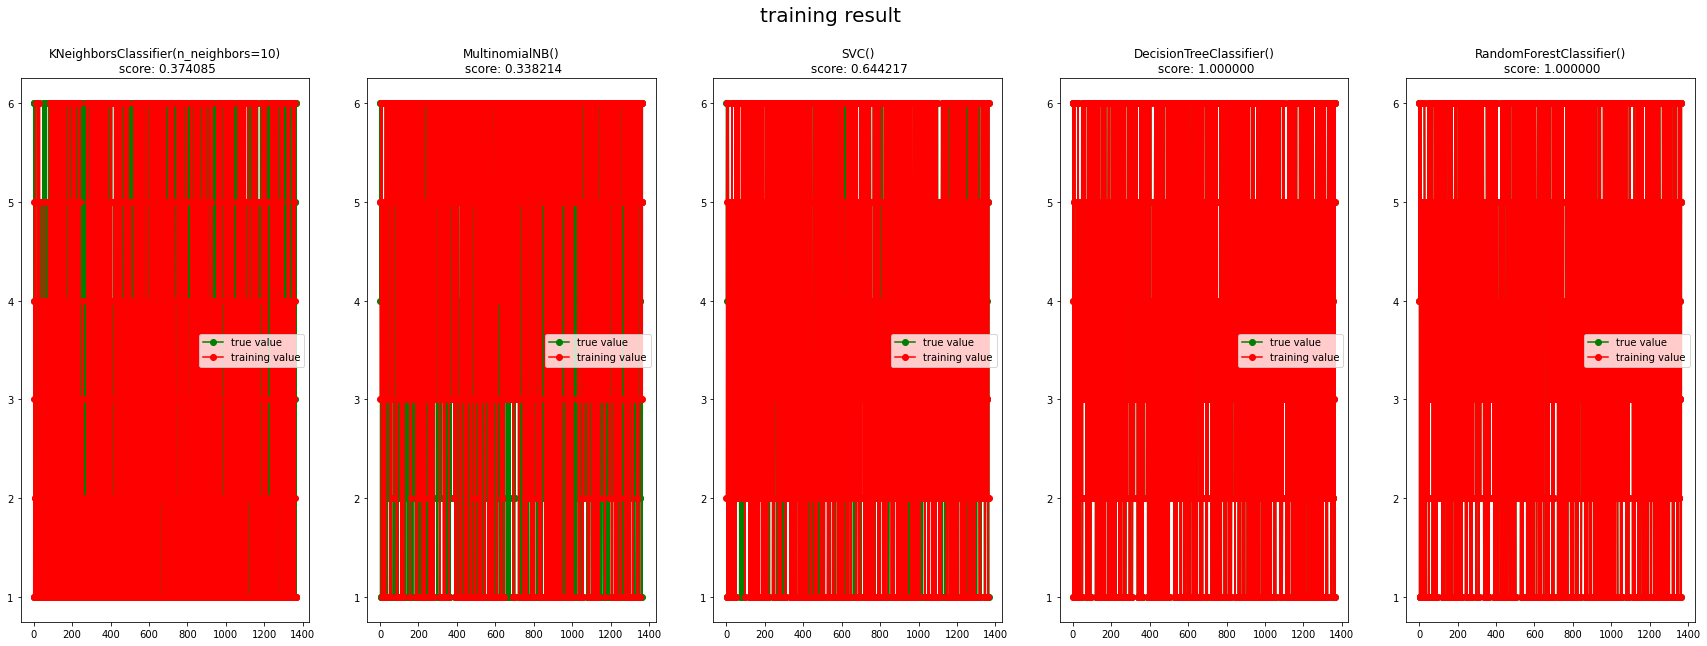

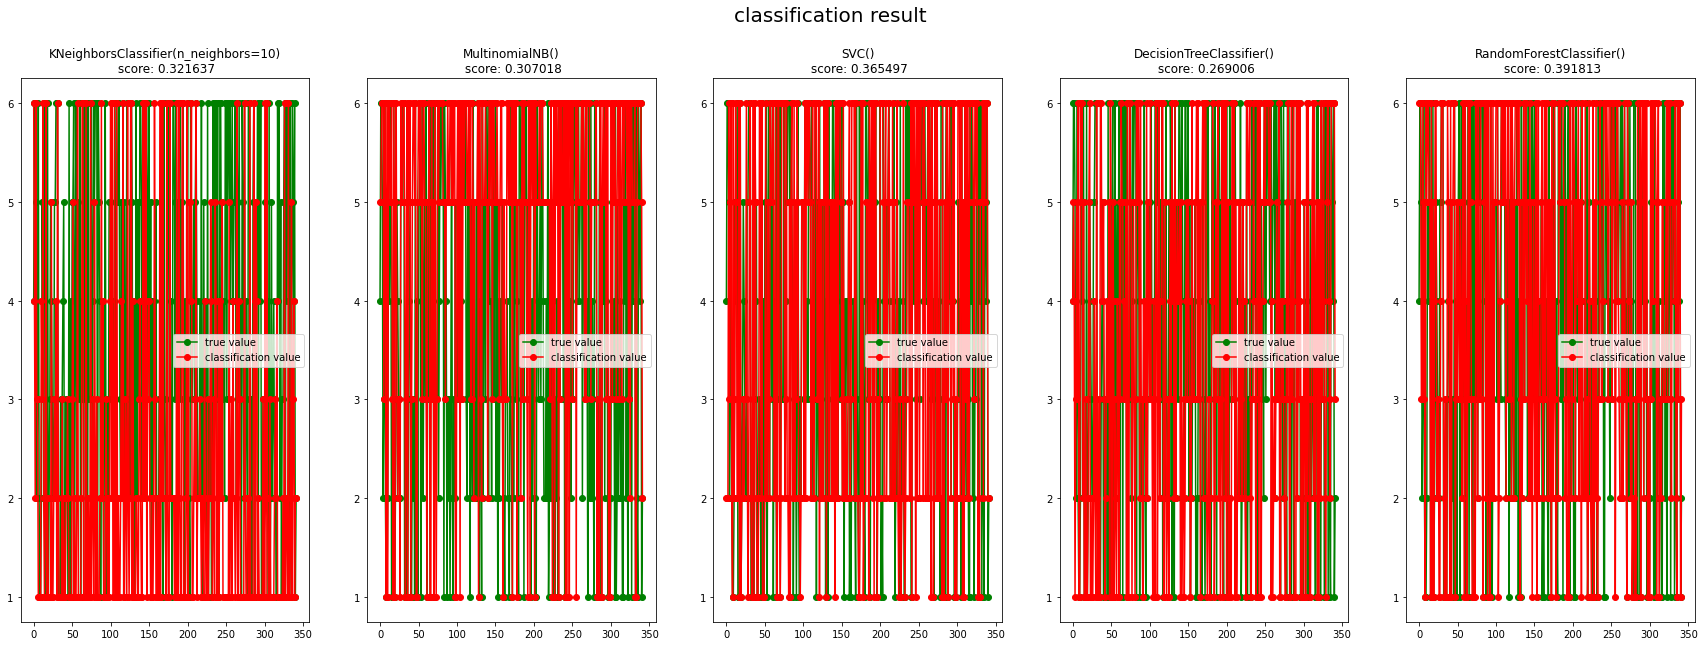

0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble, linear_model, tree, svm, neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


def load_data(path, scaling=0):
    df = pd.read_csv(path, header=None)
    df = pd.DataFrame(df.values.T)
    x = df.iloc[:, 1:]
    y = df.iloc[:, :1]
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)

    return [x_train, y_train, x_test, y_test]


def create_ml_model_list(num_estimators):
    KNN = neighbors.KNeighborsClassifier(n_neighbors=10)
    MNBmodle = MultinomialNB()
    SVC = svm.SVC()
    DecisionTree = DecisionTreeClassifier()
    RandomForestClassifier = ensemble.RandomForestClassifier()
    return [KNN,  MNBmodle, SVC, DecisionTree, RandomForestClassifier]


def try_different_ml_model(data, model_list):
    x_train, y_train, x_test, y_test = data
    fig_1 = plt.figure(num=1, figsize=(30, 10))
    fig_2 = plt.figure(num=2, figsize=(30, 10))
    fig_1.suptitle('training result', fontsize=20)
    fig_2.suptitle('classification result', fontsize=20)

    for model in model_list:
        num = model_list.index(model) + 1
        model.fit(x_train, y_train)
        training_score = model.score(x_train, y_train)
        classification_score = model.score(x_test, y_test)

        training_result = model.predict(x_train).reshape(-1, 1)
        classification_result = model.predict(x_test).reshape(-1, 1)

        ax = fig_1.add_subplot(1, 5, num)

        ax.plot(np.arange(len(training_result)), np.array(y_train), 'go-', label='true value')
        ax.plot(np.arange(len(training_result)), training_result, 'ro-', label='training value')
        ax.set_title(str(model) + '\n score: %f' % training_score)
        ax.legend()

        ay = fig_2.add_subplot(1, 5, num)
        ay.plot(np.arange(len(classification_result)), np.array(y_test), 'go-', label='true value')
        ay.plot(np.arange(len(classification_result)), classification_result, 'ro-', label='classification value')
        ay.set_title(str(model) + '\n score: %f' % classification_score)
        ay.legend()

    plt.show()
    return classification_result


def try_nn_model(data):
    x_train, y_train, x_test, y_test = data
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_dim=x_train.shape[1], activation="tanh"))
    model.add(tf.keras.layers.Dense(100, activation="tanh"))
    model.add(tf.keras.layers.Dense(1, activation="tanh"))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])
    model.fit(x_train, y_train, batch_size=64, epochs=100)
    [loss, mae] = model.evaluate(x=x_test, y=y_test)
    print('Testing set Mean Squared Error: ' + str(loss))
    print('Testing set Mean Abs Error: ' + str(mae))


    fig = plt.figure(figsize=(10, 4))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(np.arange(len(classification_result)), y_train, 'go-', label='true value')
    ax.plot(np.arange(len(classification_result)), classification_result, 'ro-', label='classification value')
    ax.set_title('NN classification')
    ax.legend()

    ay = fig.add_subplot(1, 2, 2)
    ay.plot(np.arange(len(classification_result)), y_test, 'go-', label='true value')
    ay.plot(np.arange(len(classification_result)), classification_result, 'ro-', label='classification value')
    ay.set_title('NN classification')
    ay.legend()


    plt.show()
    return classification_result




if __name__ == "__main__":
    data_path = 'dataset/summary.csv'
    data = load_data(data_path)
    model_list = create_ml_model_list(num_estimators=100)

    # try_nn_model(data)
    try_different_ml_model(data, model_list)

    print(0)
